# After sales text clustering using TF-IDF and KMeans

## Data preprocessing (Merging the translated text)

In [1]:
import os

import pandas as pd
import matplotlib.pyplot as plt
from src.preprocessing.incidencias import Incidencias
from src.preprocessing.articulos import Articulos
from src.preprocessing.dataset import Dataset

# Load the data

In [2]:
# Get articulos
articulos = Articulos().get_articulos().data
# Load incidencias
incidencias = (
    Incidencias()
    .get_incidencias()
    .load_best_match("../DATA/fuzzy_matches_w_scores.csv")
    .data
)

clean_dataset = Dataset(incidencias, articulos).generate_dataset().data

C:\Users\voliveira\OneDrive - Corporacion Empresarial Altra SL\00-Proyectos\myzone\src\db\connections.py:62: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  data = pd.read_sql(query, conn)
C:\Users\voliveira\OneDrive - Corporacion Empresarial Altra SL\00-Proyectos\myzone\src\preprocessing\incidencias.py:200: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  clean_dataset.fillna("", inplace=True)
C:\Users\voliveira\OneDrive - Corporacion Empresarial Altra SL\00-Proyectos\myzone\src\preprocessing\incidencias.py:72: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change

In [3]:
clean_dataset.sample(10)

,id,web_id,codigo,creation_date,modification_date,company_id,user_id,ref_cliente,portes_airzone,devaluacion,...,DESCART,CAR1,CAR2,CAR3,CAR4,DESCCAR1,DESCCAR2,DESCCAR3,DESCCAR4,text_to_analyse
8324,13328,1,MGJVNJDR3D,2018-12-13 08:41:14,2019-01-11 13:35:14,494,145.0,ASISTENCIAS VARIAS,1,0,...,Modulo zona motor cable Airzone 32Z,1,251,95,None,SISTEMAS DE ZONAS,ACUAZONE (DI6),MODULOS DE ZONA,NaN,"PASARELA MEL, NO DA ORDENES\r\n\r\nMODULO DE Z..."
17468,28603,1,AWHSAGZS7E,2021-06-30 09:18:34,2021-07-20 12:30:38,99,175.0,LUIS IÑIGO,1,0,...,Termostato cable a color Airzone Blueface blan...,1,250,91,1,SISTEMAS DE ZONAS,FLEXA (CE6),TERMOSTATOS,BLUEFACE,No se enciende la pantalla bien del termostato...
3858,6152,1,AMCXCPDIDE,2017-07-27 11:32:33,2017-07-31 13:36:13,481,111.0,FLUICO,1,0,...,Webserver Airzone Cloud Wi-Fi (2013),1,260,93,None,SISTEMAS DE ZONAS,COMUNES,WEB SERVER & INTEGRACION,NaN,AVERIADO. GESTIONADO POR POST VENTA NUBE WS AV...
28180,45337,1,MJIEMZXIAD,2023-03-24 11:19:29,2023-04-10 07:44:46,4411,5910.0,A220000142,1,0,...,Central de control de producción hidrónica Air...,1,260,92,None,SISTEMAS DE ZONAS,COMUNES,CONTROLADORES CENTRALIZADOS,NaN,unidades descatalogadas CENTRAL DE CONTROL DE ...
24642,39735,3,ZGXHAWIABE,2022-09-29 07:53:40,2022-10-26 08:03:59,3889,5162.0,2214028,1,0,...,Termostato radio monocromo Airzone Think blanc...,1,250,91,2,SISTEMAS DE ZONAS,FLEXA (CE6),TERMOSTATOS,THINK,Hemos vendido dos mandos think Radio que no fu...
1568,2595,2,BMTKAPDK67,2016-09-23 15:12:15,2016-10-03 12:32:06,799,1005.0,9000243,1,0,...,TERMOSTATO ZONA FLEXA BLANCO,1,250,91,109,SISTEMAS DE ZONAS,FLEXA (CE6),TERMOSTATOS,TERMOSTATOS,zonaflexbr que ya no funciona expediente de ga...
22280,35997,3,AWDPYWCV33,2022-05-06 13:42:28,2022-08-08 11:42:42,193,4396.0,RESO MATERIALE ASSISTENZE,1,0,...,Modulo zona motor cable Airzone 32Z,1,251,95,None,SISTEMAS DE ZONAS,ACUAZONE (DI6),MODULOS DE ZONA,NaN,DEVOLUCIÓN DE MATERIAL DE ASISTENCIA EL MÓDUL...
12735,21768,2,M2TRMM1P21,2020-07-02 12:48:17,2020-09-02 06:18:25,366,501.0,114-20 BEROKI,1,0,...,Termostato cable a color Airzone Blueface blan...,1,250,91,1,SISTEMAS DE ZONAS,FLEXA (CE6),TERMOSTATOS,BLUEFACE,BOLETO 6263: VISTO CON Y.GARCIA TERMOSTATO BLU...
10397,17291,2,AWDQY2NQ2A,2019-08-28 07:00:24,2019-09-05 09:33:49,301,3093.0,DOSSIER 3468 CC581567 CF 148339 ACTION CLIM,1,0,...,Termostato cable a color Airzone Blueface blan...,1,250,91,1,SISTEMAS DE ZONAS,FLEXA (CE6),TERMOSTATOS,BLUEFACE,EXPEDIENTE 3468 termostato BLUEFACE IBPRO6 BLA...
9664,15704,1,BGTOZGXS17,2019-06-05 06:06:06,2019-06-24 09:28:39,496,136.0,IBERCASA,1,0,...,Termostato cable monocromo Airzone Think blanc...,1,250,91,2,SISTEMAS DE ZONAS,FLEXA (CE6),TERMOSTATOS,THINK,"NO FUNCIONA LOS TERMOSTATOS, UNO DE ELLOS VARI..."


In [4]:
# Get only the columns with the fields of interest
text_to_analyse = clean_dataset[
    [
        "desc_problema_translated",
        "descripcion_translated",
        "problema_translated",
        "cod_articulo",
        "text_to_analyse",
    ]
]
# Fill NA with empty string
text_to_analyse.fillna("", inplace=True)

C:\Users\voliveira\AppData\Local\Temp\ipykernel_8716\3067430499.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  text_to_analyse.fillna("", inplace=True)


In [5]:
text_to_analyse.head(10)

,desc_problema_translated,descripcion_translated,problema_translated,cod_articulo,text_to_analyse
0,INDICAN EXCLUSIVAMENTE QUE SE HA ESTROPEADO LA...,MODULO ALARMAS TECNICAS,INDICAN SE HA ESTROPEADO EN LA INSTALACION Y ...,MATS,INDICAN EXCLUSIVAMENTE QUE SE HA ESTROPEADO LA...
2,AZATACTORSB SE HA QUEDADO BLOQUEADO. NO PERMIT...,,TACTO BLOQUEADO. NO ENCIENDE-APAGA NI DEJA CAM...,AZATACTORSB,AZATACTORSB SE HA QUEDADO BLOQUEADO. NO PERMIT...
3,DESDE PULSADORES NO SE PUEDE SUBIR LA PERSIANA...,MODELO 2 PERSIANAS,UNA DE LAS 2 PERSIANAS NO FUNCIONA CON PULSADO...,PER2,DESDE PULSADORES NO SE PUEDE SUBIR LA PERSIANA...
4,"REJILLA MOTORIZADA DEFECTUOSA, SUSTITUIR",,Rafael el viernes llego mi pedido nº 23349 pa...,RINT040015BKMTE,"REJILLA MOTORIZADA DEFECTUOSA, SUSTITUIR Rafa..."
5,MODULO DE FANCOIL DA PROBLEMAS LAS COMUNICACI...,AZAMFANCOILC,MODULO DE FANCOIL DE ZONA 32Z,AZAMFANCOILC,MODULO DE FANCOIL DA PROBLEMAS LAS COMUNICACI...
6,MODULO DE FANCOIL NO SACA 7V POR EL BUS EN VEZ...,MODULO DE FANCOIL DE ZONA 32Z,"SE DETECTA QUE EL BLUEFACE AL ENCENDERLO, SE Q...",AZAMFANCOILC,MODULO DE FANCOIL NO SACA 7V POR EL BUS EN VEZ...
7,"Error al pedir la pasarela, a última hora hubo...",Pasarela Mitsubishi Heavy,"Error comercial, por cambio de última hora en ...",AZXEQADAPMHI,"Error al pedir la pasarela, a última hora hubo..."
8,SE HAN CAMBIADO LAS TAPAS TRASERAS VARIAS VECE...,,SE ROMPEN TAPAS TRASERAS. CAMBIAR TERMOSTATO.,AZC3BLUEFECOSB,SE HAN CAMBIADO LAS TAPAS TRASERAS VARIAS VECE...
9,SE HAN CAMBIADO LAS TAPAS TRASERAS VARIAS VECE...,,5 UNIDADES. SE ROMPEN TAPAS TRASERAS.,AZC3TACTOCSB,SE HAN CAMBIADO LAS TAPAS TRASERAS VARIAS VECE...
10,SE HAN ROTO LAS TAPAS TRASERAS EN MAS DE UNA O...,,2 UNIDADES. TAPAS TRASERAS ROTAS EN VARIAS OCA...,AZC3BLUEFECOSB,SE HAN ROTO LAS TAPAS TRASERAS EN MAS DE UNA O...


## Apply TF-IDF and KMeans clustering

In [6]:
import nltk
from nltk.corpus import stopwords
from string import punctuation
from src.preprocessing.utils import pre_process_text_nltk

# Download the stopwords and punkt
nltk.download("stopwords")
nltk.download("punkt")
nltk.download("wordnet")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\voliveira\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\voliveira\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\voliveira\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

## Training the model using a CVGridSearch pipeline

In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import silhouette_score
import mlflow
import string


class PreProcessText:
    """
    Class for preprocessing text data using the nltk library
    This class is intended to be used as a transformer in the sklearn pipeline
    """

    def __init__(
        self,
        lower_case=True,
        stop_words=None,
        punctuation=None,
        lemma=None,
        stemmer=None,
        min_df=0.01,
        max_df=0.99,
    ):
        self.lower_case = lower_case
        self.stop_words = stop_words
        self.punctuation = punctuation
        self.lemma = lemma
        self.stemmer = stemmer
        self.min_df = min_df
        self.max_df = max_df
        self.vectorizer = None

    def pre_process_text_nltk_wrapper(self, text):
        """
        Wrapper function for the pre_process_text_nltk function
        :param text: text to preprocess
        :return: preprocessed text
        """
        return pre_process_text_nltk(
            text,
            lower_case=self.lower_case,
            stop_words=self.stop_words,
            punctuation=self.punctuation,
            lemma=self.lemma,
            stemmer=self.stemmer,
        )

    def fit(self, X, y=None):
        """
        Fit the vectorizer to the text data
        """
        self.vectorizer = TfidfVectorizer(
            lowercase=False,
            preprocessor=self.pre_process_text_nltk_wrapper,
            min_df=self.min_df,
            max_df=self.max_df,
        )
        self.vectorizer.fit(X)
        return self

    def transform(self, X, y=None):
        """
        Transform the text data using the fitted vectorizer
        """
        return self.vectorizer.transform(X)

    def get_feature_names(self):
        """
        Get feature names from the vectorizer
        """
        return self.vectorizer.get_feature_names_out()

    def get_params(self, deep=True):
        """
        Get parameters for this estimator
        """
        return {
            "lower_case": self.lower_case,
            "stop_words": self.stop_words,
            "punctuation": self.punctuation,
            "lemma": self.lemma,
            "stemmer": self.stemmer,
            "min_df": self.min_df,
            "max_df": self.max_df,
        }

    def set_params(self, **params):
        """
        Set the parameters of this estimator
        """
        for key, value in params.items():
            setattr(self, key, value)
        return self


stop_words = set(stopwords.words("spanish"))
punctuation_set = set(string.punctuation)
lemma = nltk.stem.WordNetLemmatizer()
stemmer = nltk.stem.SnowballStemmer("spanish")

In [10]:
# Set the mlflow tracking uri and experiment
mlflow.set_tracking_uri("http://localhost:5000")
mlflow.set_experiment("NLP Clustering Experiment")

# Create a sklearn pipeline to apply a clustering algorithm
pipeline = Pipeline(
    [
        (
            "preprocess",
            PreProcessText(),
        ),  # Note: Use default init, params will be passed by GridSearchCV
        ("kmeans", KMeans()),
    ]
)

# Create grid search parameters
# Define parameter grid
parameters = {
    "preprocess__stop_words": [stop_words, None],
    "preprocess__punctuation": [punctuation_set, None],
    #'preprocess__lemma': [lemma, None],
    #'preprocess__min_df': [0.01, 0.05],
    #'preprocess__max_df': [0.95, 0.99],
    "kmeans__n_clusters": [250],
}


def custom_grid_search(
    pipeline, parameters, X, scoring=None, cv=2, n_jobs=-1, verbose=1
):

    grid_search = GridSearchCV(
        pipeline, parameters, cv=cv, n_jobs=n_jobs, verbose=verbose
    )

    grid_search.fit(X)

    best_params = grid_search.best_params_
    best_score = grid_search.best_score_
    best_estimator = grid_search.best_estimator_

    return best_params, best_score, best_estimator


def silhouette_scorer(estimator, X):
    labels = estimator.fit_predict(X)
    score = silhouette_score(X, labels)
    return score


with mlflow.start_run():

    best_params, best_score, best_estimator = custom_grid_search(
        pipeline, parameters, text_to_analyse["text_to_analyse"]
    )

    # Log the best parameters and score
    mlflow.log_params(best_params)
    mlflow.log_metric("best_score", best_score)

    # Log the best model
    mlflow.sklearn.log_model(best_estimator, "best_model")

Fitting 2 folds for each of 4 candidates, totalling 8 fits


2024/06/03 14:01:26 WARNING mlflow.utils.requirements_utils: Found torch version (2.3.0+cu121) contains a local version label (+cu121). MLflow logged a pip requirement for this package as 'torch==2.3.0' without the local version label to make it installable from PyPI. To specify pip requirements containing local version labels, please use `conda_env` or `pip_requirements`.


In [11]:
# Add the cluster to the dataset
vector = best_estimator.named_steps["preprocess"].transform(
    text_to_analyse["text_to_analyse"]
)
vector_df = pd.DataFrame(vector.toarray())
text_to_analyse["cluster"] = best_estimator.named_steps["kmeans"].predict(vector)

C:\Users\voliveira\AppData\Local\Temp\ipykernel_8716\1746980482.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  text_to_analyse["cluster"] = best_estimator.named_steps["kmeans"].predict(vector)


## Visualizing the most common words

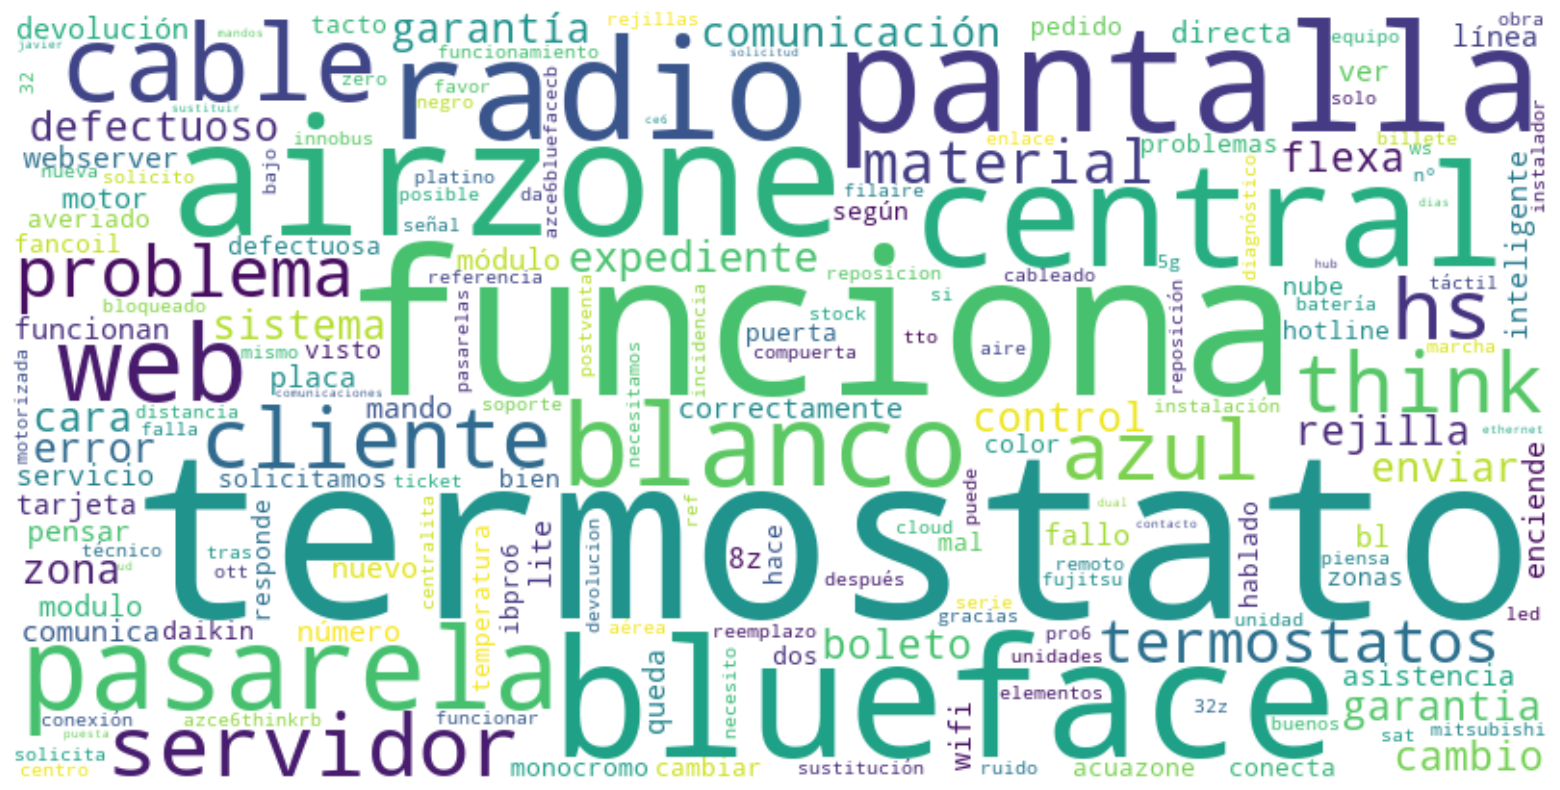

In [12]:
from wordcloud import WordCloud

# Get the feature names and frequencies
feature_names = best_estimator.named_steps["preprocess"].get_feature_names()
frequencies = vector_df.sum(axis=0).tolist()
word_freq = dict(zip(feature_names, frequencies))

# Create a cloud of words with the most common words
wordcloud = WordCloud(
    width=800, height=400, background_color="white"
).generate_from_frequencies(word_freq)

plt.figure(figsize=(20, 10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

## Visualizing the clusters

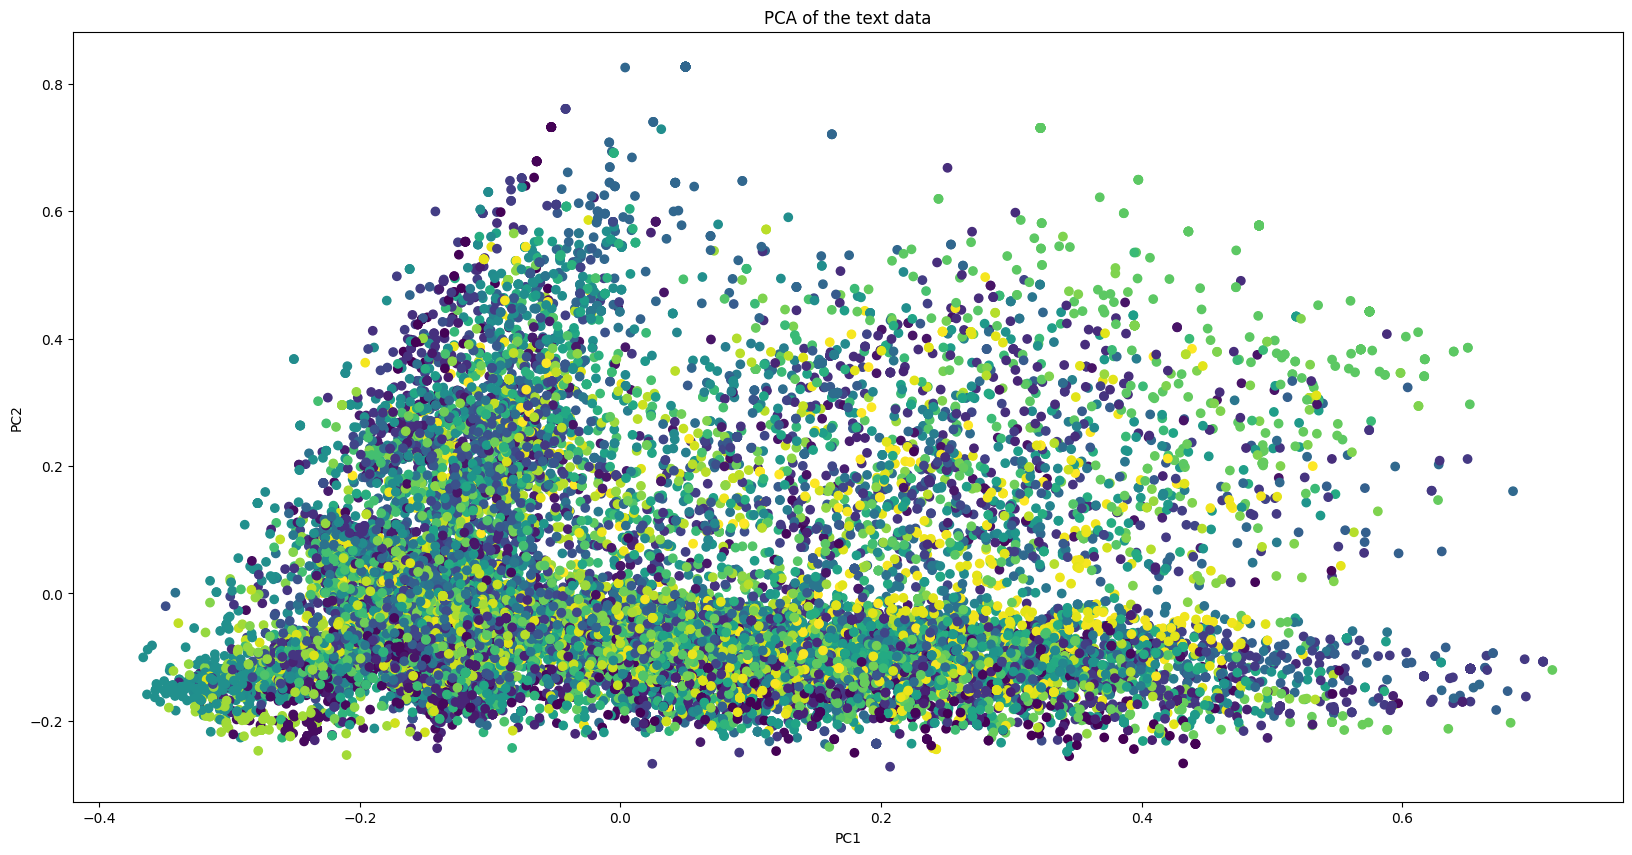

In [13]:
# Use PCA to reduce the dimensionality of the data
from sklearn.decomposition import PCA

pca = PCA(n_components=3)
pca_vector = pca.fit_transform(vector_df)
pca_vector = pd.DataFrame(pca_vector, columns=["PC1", "PC2", "PC3"])

plt.figure(figsize=(20, 10))
plt.scatter(
    pca_vector["PC1"], pca_vector["PC2"], c=text_to_analyse["cluster"], cmap="viridis"
)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("PCA of the text data")
plt.show()

In [14]:
# Plotting in 3D
%matplotlib qt
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(
    pca_vector["PC1"],
    pca_vector["PC2"],
    pca_vector["PC3"],
    c=text_to_analyse["cluster"],
    cmap="viridis",
)
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3")
plt.title("PCA of the text data")
plt.show()

In [15]:
# Use another dimensionality reduction technique
from sklearn.manifold import TSNE

tsne = TSNE(n_components=3)
tsne_vector = tsne.fit_transform(vector_df)
tsne_vector = pd.DataFrame(tsne_vector, columns=["TSNE1", "TSNE2", "TSNE3"])

In [16]:
%matplotlib qt
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(
    tsne_vector["TSNE1"],
    tsne_vector["TSNE2"],
    tsne_vector["TSNE3"],
    c=text_to_analyse["cluster"],
    cmap="viridis",
)
ax.set_xlabel("TSNE1")
ax.set_ylabel("TSNE2")
ax.set_zlabel("TSNE3")
plt.title("TSNE of the text data")
plt.show()

In [17]:
# Create a temporary column 'temp_index' to assign a unique row identifier within each cluster
text_to_analyse["temp_index"] = text_to_analyse.groupby("cluster").cumcount()

# Pivot the DataFrame
pivoted_df = text_to_analyse.pivot(
    index="temp_index", columns="cluster", values="text_to_analyse"
)

# Optionally, if you don't want the multi-level index that comes from pivoting
pivoted_df.columns = [f"Cluster_{int(col)}" for col in pivoted_df.columns]

# Drop the index if it is irrelevant
pivoted_df.reset_index(drop=True, inplace=True)

C:\Users\voliveira\AppData\Local\Temp\ipykernel_8716\4278190465.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  text_to_analyse["temp_index"] = text_to_analyse.groupby("cluster").cumcount()


In [18]:
pivoted_df.head(50)

,Cluster_0,Cluster_1,Cluster_2,Cluster_3,Cluster_4,Cluster_5,Cluster_6,Cluster_7,Cluster_8,Cluster_9,...,Cluster_240,Cluster_241,Cluster_242,Cluster_243,Cluster_244,Cluster_245,Cluster_246,Cluster_247,Cluster_248,Cluster_249
0,TEL PENSAR RADIO REF NOVOA HS\r\nSET comprado ...,NO FUNCIONA LA PASARELA KNX PARARELO KNX NO FU...,"El web server cloud no comunica con el router,...",SALEN CUADRADITOS EN PANTALLA TERMOSTATO PENSA...,LA MÁQUINA NO SE DETIENE AUN CUANDO SE ALCANZA...,ABRIR ARCHIVO LÍNEA DIRECTA 3856\r\nPROBLEMA E...,Casa B Sótano Dim4 00:00:03:595 \r\ndimmer av...,"PIERDE LA CONEXIÓN, VISTO CON ESPOSITO CAMBIO ...",VER EXPEDIENTE 15538 TARJETA WEB SERVIDOR NUBE...,"TERMOSTATO BLUEFACE FLEXA, LECTURA TEMPERATURA...",...,"por favor sacar este material a mi nombre, es ...",SE HAN CAMBIADO LAS TAPAS TRASERAS VARIAS VECE...,THINK RADIO SE QUEDA CONGELADO Y PIXELADO POR ...,Hace mal contacto. Si lo aprietas con las mano...,EL TERMOSTATO AZC3BLUEFECOSB TIENE EL PANEL TA...,MEZCLA DE AZC Y AZC3 – PROBLEMAS DE FUNCIONAMI...,NO FUNCIONA TERMOSTATO.DIST.AIRZONE LITE 32 Z....,MATERIALES PARA DEMOSTRACIÓN Y EXHIBICIÓN\r\nM...,CAMBIO DE TERMOSTATOS Y CENTRALITAS TERMOSTATO...,MI COMPAÑERO JOSE GONZALEZ HABLA CON CARLOS PA...
1,HS TERMOSTATO MONOCROMO AIRZONE PENSAR 8Z FILA...,PASARELA LGE NO FUNCIONA PASARELA LGE LA PASAR...,WS RADIO PERO NECESITO ME ENVIEIS UNO POR CABL...,"2 THINK, SE HAN QUEDADO LAS PANTALLAS PIXELADA...",EL TERMOSTATO DE CARA AZUL SE SOBRECALENTA Y P...,Tablero principal HS TERMOSTATO AZUL DOSIER LÍ...,MOTOR DE REJILLA AVERIADO RINT060015BKMTE SEGU...,ENVÍA UN SERVIDOR WEB SIGUIENDO NUESTRO PEDIDO...,VER EXPEDIENTE N° 15195 = S/G DIRECTO SIN SOLI...,BLUEFACE LEE MAL LA TEMPERATURA LA SONDA BLUEF...,...,"por favor sacar este material a mi nombre, es ...",Error de pedido del cliente para RPI 4 FSN4E\r...,Think radio se queda la pantalla congelada y p...,"LOS MODULOS NO RESPONDEN, SEGUN INSTALADOR ES ...",AZC3BLUEFECOSB TERMOSTATO BLUEFACE CABLE BLANC...,Sobrecalentamiento aleatorio PASARELA DE COMUN...,SUSTITUCIÓN DEL SISTEMA INNOBUS PRO 32 DEFECTU...,Rango de reserva de existencias 2016\r\n\r\n>>...,CAMBIO DE TERMOSTATOS Y CENTRALITAS TERMOSTATO...,"VENIA CON LA PLACA EXTERIOR SUELTA, AL INSTALA..."
2,TERMOSTATO HS TERMOSTATO MONOCROMO AIRZONE PEN...,Pasarela de comunicacion de fan coil 3V no fun...,EL WS CABLE HA PERDIDO LA CONEXION DESPUES DE ...,"2 THINK, SE HAN QUEDADO LAS PANTALLAS PIXELADA...",Reset termostato de vez en cuenta CARA AZUL R...,Problema de cambio de modo. termostato azul ca...,El termostato Blueface está averiado. El Term...,Número de seguimiento 14 133\r\nPasando un ser...,VER EXPEDIENTE DE SERVICIO N° 19766 TARJETA WE...,"Instalador Climat, blueface mide mal la temper...",...,"por favor sacar este material a mi nombre, es ...",Se gestionó el pedido por error de forma dupli...,"EN INSTALACION CON 7 THINK RADIO, 2 DE ELLOS S...",Estoy haciendo la puesta en marcha del sistema...,UN TERMOSTATO BLUEFACE DE SISTEMA UNO SE VUELV...,cambiar de AZC3 a AZC6 para detectar un proble...,SUSTITUCIÓN DEL SISTEMA INNOBUS PRO 32 DEFECTU...,Para probar en ME FRP71 TERMOSTATO IBPRO6 INTE...,CAMBIO DE TERMOSTATOS Y CENTRALITAS TEROMOSTAT...,NO FUNCIONA\r\nSOLICITAMOS UNA NUEVA PARA CAMB...
3,SEÑAL RADIOTERMOSTATO PENSAR HS\r\nVERSIÓN TER...,NO FUNCIONA PASARELA PANASONIC-AIRZONE NO FUNC...,NECESITO WS CARRIL DIN CABLE. EL DE WIFI DA PR...,En el fondo de la pantalla del termostato apar...,cara azul Termostato blueface blanco cara azul,LÍNEA DIRECTA DE ENTRADAS 7747 CARRITO POUR PA...,El mando está averiado Termostato averiado,MAJ Blueface y carta. Servidor web Actualiza B...,VER EXPEDIENTE N° 22292 TARJETA WEB SERVIDOR N...,"Instalador Climat, blueface mide mal la temper...",...,"por favor sacar este material a mi nombre, es ...",Hemos recibido el pedido completo 16003015/2. ...,Ya lo he hablado por teléfono con Rafael Vera....,CAMBIO PASARELAS El termostato aparece con to...,"TERMOSTATO NUEVO, NO FUNCIONA . TERM

In [19]:
clean_dataset.head()

,id,web_id,codigo,creation_date,modification_date,company_id,user_id,ref_cliente,portes_airzone,devaluacion,...,DESCART,CAR1,CAR2,CAR3,CAR4,DESCCAR1,DESCCAR2,DESCCAR3,DESCCAR4,text_to_analyse
0,49,1,YZ2YZZUU16,2015-04-27 09:32:18,2015-05-28 06:55:45,498,128.0,CENTRAL ALARMAS,1,0,...,Central de alarmas técnicas multifunción,3,265,94,None,AT HOME,AT HOME,MODULOS DE CONTROL,NaN,INDICAN EXCLUSIVAMENTE QUE SE HA ESTROPEADO LA...
2,50,1,ZP2CZZYVBD,2015-04-27 09:51:49,2015-06-03 09:09:08,499,117.0,SPLITMANIA JEREZ-ANTONIO GARCIA PADILLA,1,0,...,Termostato Tacto superficie radio (AZA) - Blanco,1,251,91,4,SISTEMAS DE ZONAS,ACUAZONE (DI6),TERMOSTATOS,TACTO,AZATACTORSB SE HA QUEDADO BLOQUEADO. NO PERMIT...
3,46,1,YPUEA5WZ10,2015-04-20 14:44:57,2015-05-28 06:21:09,498,128.0,REPARACION MODULO PERSIANA,1,0,...,Módulo de control de 2 persianas con pulsador,3,265,94,None,AT HOME,AT HOME,MODULOS DE CONTROL,NaN,DESDE PULSADORES NO SE PUEDE SUBIR LA PERSIANA...
4,51,1,ZPWBA5ETF7,2015-04-27 14:49:58,2015-05-13 16:33:58,497,135.0,"REJILLA DE JESUS VELASCO, SPLITMANIA HUELVA",1,0,...,Rejilla Inteligente doble Airzone motorizada 4...,1,264,31,92,SISTEMAS DE ZONAS,DIFUSION MOTORIZADA,REJILLAS,RINT,"REJILLA MOTORIZADA DEFECTUOSA, SUSTITUIR Rafa..."
5,53,1,ZP2CAPUAA9,2015-05-05 05:58:02,2015-05-26 17:15:39,498,128.0,OFICINAS PROSEGUR-GARANTIA,1,0,...,Módulo de zona fancoil cableado Airzone (AZA),1,251,95,None,SISTEMAS DE ZONAS,ACUAZONE (DI6),MODULOS DE ZONA,NaN,MODULO DE FANCOIL DA PROBLEMAS LAS COMUNICACI...


In [20]:
clean_dataset.groupby(["cod_articulo"]).size().sort_values(ascending=False)

cod_articulo
AZCE6BLUEFACECB    2823
AZCE6THINKRB       2450
AZCE6FLEXA3         823
AZCE6BLUEZEROCB     722
AZCE6THINKCB        690
                   ... 
AZO3TACTORSB          1
AZNCE6FLEXA3          1
AZIX6QADATTMEL        1
AZI6MZZONC            1
zprco20015mte         1
Length: 2729, dtype: int64

In [ ]:
# Save clean dataset in desktop and wrap the strings into aspas
clean_dataset.to_csv(
    "C:/Users/voliveira/Desktop/clean_dataset.csv", index=False, quoting=1
)

In [ ]:
clean_dataset[clean_dataset["codigo"] == "AMXGAZXJA8"]